# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.  All of these files are found in our usual s3 bucket: `https://hds5210-data.s3.amazonaws.com`

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.

* https://hds5210-data.s3.amazonaws.com/npidata.csv


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

* https://hds5210-data.s3.amazonaws.com/cms2014.csv
* https://hds5210-data.s3.amazonaws.com/cms2015.csv
* https://hds5210-data.s3.amazonaws.com/cms2016.csv

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [122]:
import pandas as pd

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [123]:
import pandas as pd

def load_and_combine_cms_data():
    """
    Load CMS datasets for the years 2014, 2015, and 2016,
    standardize column names, align columns for consistency,
    and concatenate them into a single DataFrame with a 'year' column.

    Returns:
        pd.DataFrame: Combined CMS data with an added 'year' column.

    >>> combined_cms = load_and_combine_cms_data()
    >>> combined_cms['year'].nunique()  # Check the number of unique years
    3
    >>> combined_cms.shape[0] > 0  # Ensure there is data in the combined DataFrame
    True
    >>> combined_cms['year'].isin([2014, 2015, 2016]).all()  # Ensure years are correct
    True
    """
    # First step is to load the CMS datasets
    cms_2014 = pd.read_csv("/content/cms2014.csv")
    cms_2015 = pd.read_csv("/content/cms2015.csv")
    cms_2016 = pd.read_csv("/content/cms2016.csv")

    # Next, we have to standardize column names: lowercase and strip whitespace
    cms_2014.columns = cms_2014.columns.str.lower().str.strip()
    cms_2015.columns = cms_2015.columns.str.lower().str.strip()
    cms_2016.columns = cms_2016.columns.str.lower().str.strip()

    # Then, we have to align columns to ensure consistency
    all_columns = list(set(cms_2014.columns) | set(cms_2015.columns) | set(cms_2016.columns))
    cms_2014 = cms_2014.reindex(columns=all_columns)
    cms_2015 = cms_2015.reindex(columns=all_columns)
    cms_2016 = cms_2016.reindex(columns=all_columns)

    # Now add year column to each dataset to concatenate them
    cms_2014["year"] = 2014
    cms_2015["year"] = 2015
    cms_2016["year"] = 2016

    combined_cms = pd.concat([cms_2014, cms_2015, cms_2016], axis=0, ignore_index=True)
    return combined_cms

answer = load_and_combine_cms_data()

In [124]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [125]:
import numpy
import pandas as pd

def load_and_merge_cms_npi_data():
    """
    Load and preprocess CMS data for the years 2014, 2015, and 2016,
    merge it with NPI data, and return the merged DataFrame.

    The function ensures:
    - CMS data column names are standardized to lowercase.
    - CMS datasets are combined with an added 'year' column.
    - NPI data is merged with the CMS data using the 'npi' column.

    Returns:
        pd.DataFrame: Merged CMS and NPI data.

    >>> merged_data = load_and_merge_cms_npi_data()
    >>> merged_data['year'].nunique()  # Check that there are 3 years in the data
    3
    >>> 'npi' in merged_data.columns  # Ensure NPI column exists in the merged data
    True
    >>> merged_data.shape[0] > 0  # Ensure the merged data has rows
    True
    """
    # First we have to load and preprocess CMS data
    cms_2014 = pd.read_csv('cms2014.csv')
    cms_2014.columns = cms_2014.columns.str.lower()
    cms_2015 = pd.read_csv('cms2015.csv')
    cms_2015.columns = cms_2015.columns.str.lower()
    cms_2016 = pd.read_csv('cms2016.csv')
    cms_2016.columns = cms_2016.columns.str.lower()

    # Now combine CMS data into a single DataFrame
    combined_cms = pd.concat(
        [cms_2014, cms_2015, cms_2016],
        axis=0,
        sort=False,
        keys=[2014, 2015, 2016],
        names=['year']
    ).reset_index(level='year')

    # Then we have ton load NPI data
    npi_data = pd.read_csv('/content/npidata.csv')

    # Convert 'npi' columns to string for consistency
    combined_cms['npi'] = combined_cms['npi'].astype(str)
    npi_data['NPI'] = npi_data['NPI'].astype(str)

    # Finally, merge CMS and NPI data
    merged_data = pd.merge(combined_cms, npi_data, how='left', left_on='npi', right_on='NPI')

    return merged_data

answer = load_and_merge_cms_npi_data()

<ipython-input-125-9526073c0840>:43: DtypeWarning: Columns (18,33) have mixed types. Specify dtype option on import or set low_memory=False.
  npi_data = pd.read_csv('/content/npidata.csv')


In [126]:
import numpy
assert(answer.shape == (193862, 103))
assert(list(answer['Provider Business Mailing Address State Name'].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name').NPI.count()) == [111520, 53366, 4805])

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [127]:
def add_state_column(answer):
    """
    Add a 'State' column to the given DataFrame.
    The new column will contain the values from the 'Provider Business Mailing Address State Name' column,
    replacing any NaN values with 'XX'.

    Parameters:
        answer (pd.DataFrame): The DataFrame to which the 'State' column will be added.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'State' column.

    >>> import pandas as pd
    >>> data = {'Provider Business Mailing Address State Name': ['IL', None, 'MO']}
    >>> df = pd.DataFrame(data)
    >>> updated_df = add_state_column(df)
    >>> updated_df['State'].tolist()  # Check the new 'State' column values
    ['IL', 'XX', 'MO']
    >>> updated_df.shape[1]  # Ensure the number of columns increased by 1
    2
    """
    # In this we have to create the 'State' column based on the 'Provider Business Mailing Address State Name' column
    answer['State'] = answer['Provider Business Mailing Address State Name'].fillna('XX')
    return answer

answer = add_state_column(answer)

In [128]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
assert(answer.shape == (193862, 104))

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

Pivot Table:
year          2014         2015         2016
state                                       
IL     101393758.4  103048716.3  105432032.4
MO      48577227.1   50808468.0   50854632.1
WY       3487240.6    3800978.9    3604487.9
XX      14938636.4   16533705.2   16705781.4


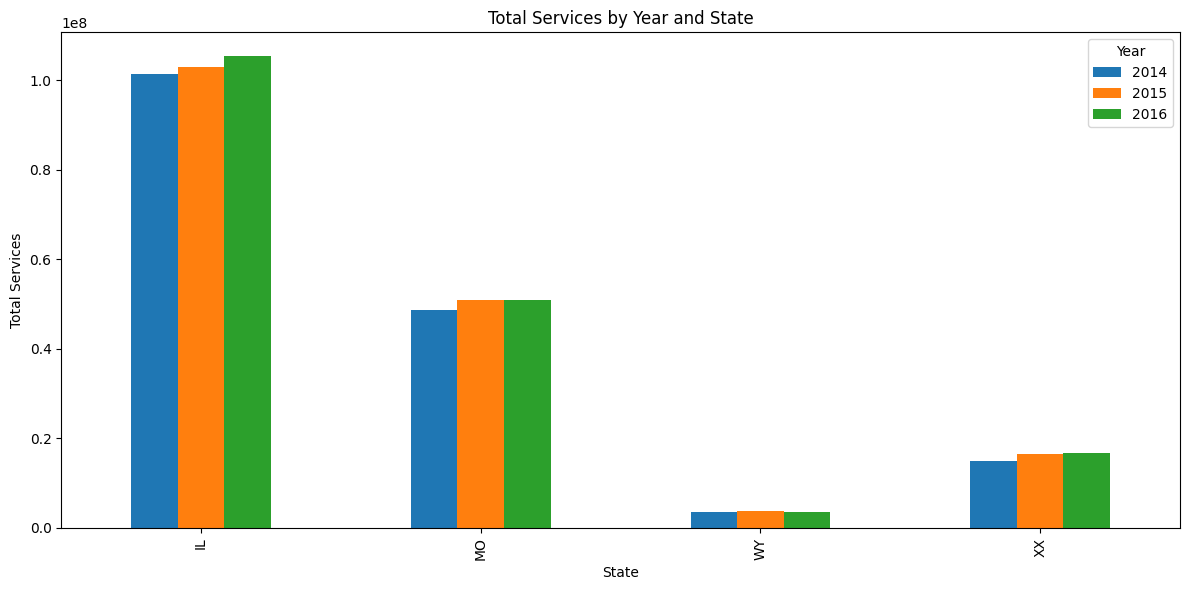

In [129]:
import matplotlib.pyplot as plt
import numpy as np

answer.columns = answer.columns.str.lower()

# First we have to create the pivot table
pivot_answer = answer.pivot_table(
    index='state',
    columns='year',
    values='total_services',
    aggfunc='sum',
    fill_value=0
)

answer = pivot_answer

print("Pivot Table:")
print(answer)

# Plot the pivot table as a bar chart
%matplotlib inline
answer.plot(kind='bar', figsize=(12, 6))
plt.title("Total Services by Year and State")
plt.xlabel("State")
plt.ylabel("Total Services")
plt.legend(title="Year")
plt.tight_layout()
plt.show()


In [130]:
assert(answer.shape == (4,3))
assert answer.sum().sum() == 519185664.7
assert(answer[2016].sum() == 176596933.8)
assert(answer.loc['WY'].sum() == 10892707.4)

<Axes: xlabel='state'>

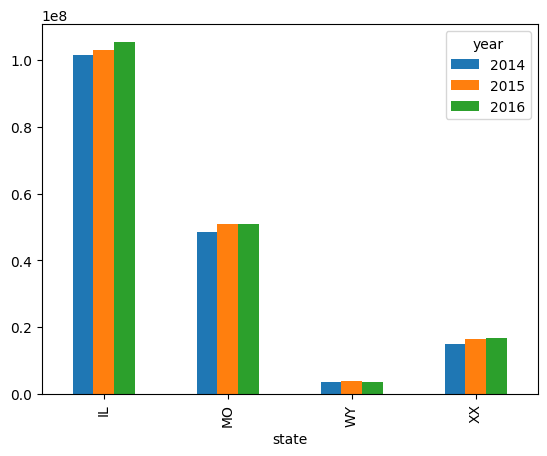

In [131]:
%matplotlib inline
answer.plot.bar()